In [1]:
    # !pip install medmnist

In [ ]:
# https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb

In [ ]:
%load_ext autoreload
%autoreload 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import medmnist
from medmnist import INFO, Evaluator
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision
import torch.nn.functional as F

from tqdm import tqdm

%aimport vq_vae_model

%aimport utils
from utils import plot_real_vs_constructed 
# from basic_vae import VariationalAutoencoder

C:\Users\kella\anaconda3\envs\dgm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
UsageError: Line magic function `%aimport` not found.


In [3]:
#data_flag = 'pathmnist'
#data_flag = 'breastmnist'
# data_flag = 'octmnist'
# data_flag = 'chestmnist'
#data_flag = 'bloodmnist'
data_flag = 'organamnist'
#data_flag = 'tissuemnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 64
lr = 0.0001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
                                      transforms.ToTensor(),
                                      #transforms.Normalize((0.5,0.5,0.5), (1.0,1.0,1.0))
                                  ])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)


Using downloaded and verified file: C:\Users\kella\.medmnist\organamnist.npz
Using downloaded and verified file: C:\Users\kella\.medmnist\organamnist.npz
Using downloaded and verified file: C:\Users\kella\.medmnist\organamnist.npz


In [4]:
train_dataset.imgs.shape

(34581, 28, 28)

C:\Users\kella\anaconda3\envs\dgm\lib\site-packages\medmnist\utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


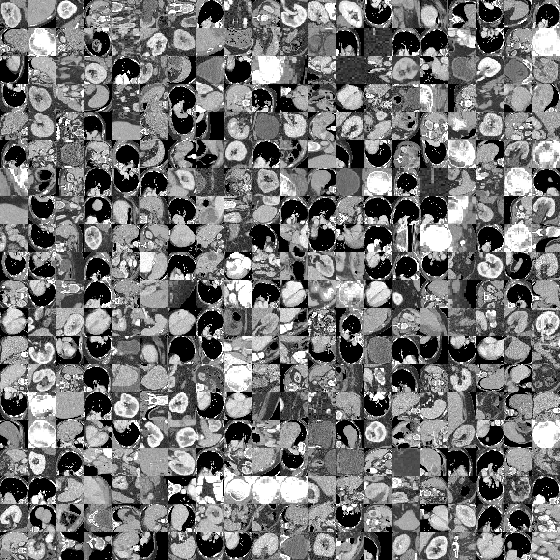

In [5]:
train_dataset.montage()

In [6]:
train_dataset.imgs.max()

255

In [7]:
batch_size = 256
num_training_updates = 15000

num_hiddens = 128
num_residual_hiddens = 32
num_residual_layers = 2

embedding_dim = 64
num_embeddings = 512

commitment_cost = 0.25

decay = 0.99

learning_rate = 1e-3
channel = 1

In [ ]:
from vq_vae_model import VariationalAutoencoder


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vae = VariationalAutoencoder(num_hiddens, num_residual_layers, num_residual_hiddens,
              num_embeddings, embedding_dim, 
              commitment_cost,decay,input_channel=channel ,output_channel=channel ).to(device) # GPU

vae.train(train_loader, lr=0.001, epochs=10, device=device)
# vae.train(train_loader, lr=0.0001, epochs=10, device=device)
# plot_latent(vae, train_loader)

100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:37<00:00, 14.49it/s]


1 iterations
recon_error: 3.481
perplexity: 1.000



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:32<00:00, 16.88it/s]


2 iterations
recon_error: 1.406
perplexity: 3.745



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:32<00:00, 16.77it/s]


3 iterations
recon_error: 1.379
perplexity: 3.936



  4%|███▎                                                                             | 22/541 [00:00<00:15, 34.11it/s]

In [13]:
vae.train(train_loader, lr=0.0001, epochs=10, device=device)

100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:30<00:00, 17.77it/s]


1 iterations
recon_error: 0.175
perplexity: 208.210



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:31<00:00, 17.34it/s]


2 iterations
recon_error: 0.175
perplexity: 225.089



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:31<00:00, 17.37it/s]


3 iterations
recon_error: 0.172
perplexity: 235.613



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:31<00:00, 17.29it/s]


4 iterations
recon_error: 0.170
perplexity: 252.649



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:32<00:00, 16.52it/s]


5 iterations
recon_error: 0.169
perplexity: 262.029



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:30<00:00, 17.50it/s]


6 iterations
recon_error: 0.170
perplexity: 270.560



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:31<00:00, 17.11it/s]


7 iterations
recon_error: 0.167
perplexity: 278.088



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:31<00:00, 17.29it/s]


8 iterations
recon_error: 0.167
perplexity: 288.210



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:31<00:00, 17.41it/s]


9 iterations
recon_error: 0.165
perplexity: 295.659



100%|████████████████████████████████████████████████████████████████████████████████| 541/541 [00:30<00:00, 17.88it/s]

10 iterations
recon_error: 0.164
perplexity: 301.503



In [14]:
def plot_real_vs_constructed(vae, test_dataset, device):
    imgs = np.zeros((4*29, 8*29, 3))
    diff = 0.
    for i in range(8):
        test_img = test_dataset[i][0][None,:,:,:].to(device)
        z = vae._encoder(test_img)
        z = vae._pre_vq_conv(z)
        loss, quantized, perplexity, _ = vae._vq_vae(z)
        img = vae._decoder(quantized)


        imgs[:28, i*28+(i*1):(i+1)*28+(i*1), :] = test_img[0].moveaxis(0, 2).cpu().detach().numpy()
        imgs[28+1:28*2+1, i*28+(i*1):(i+1)*28+(i*1), :] = img[0].moveaxis(0, 2).cpu().detach().numpy()

        diff += ((test_img - img)**2).mean()

    for i in range(8):
        test_img = test_dataset[i+8][0][None,:,:,:].to(device)
        z = vae._encoder(test_img)
        z = vae._pre_vq_conv(z)
        loss, quantized, perplexity, _ = vae._vq_vae(z)
        img = vae._decoder(quantized)

        imgs[2*29+1:3*28+3, i*28+(i*1):(i+1)*28+(i*1), :] = test_img[0].moveaxis(0, 2).cpu().detach().numpy()
        imgs[3*28+4:, i*28+(i*1):(i+1)*28+(i*1), :] = img[0].moveaxis(0, 2).cpu().detach().numpy()

        diff += ((test_img - img)**2).mean()

    print((diff/8).item())        
    plt.figure(figsize=(20,20))
    plt.imshow(imgs, cmap="gray")
    plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.01963297463953495


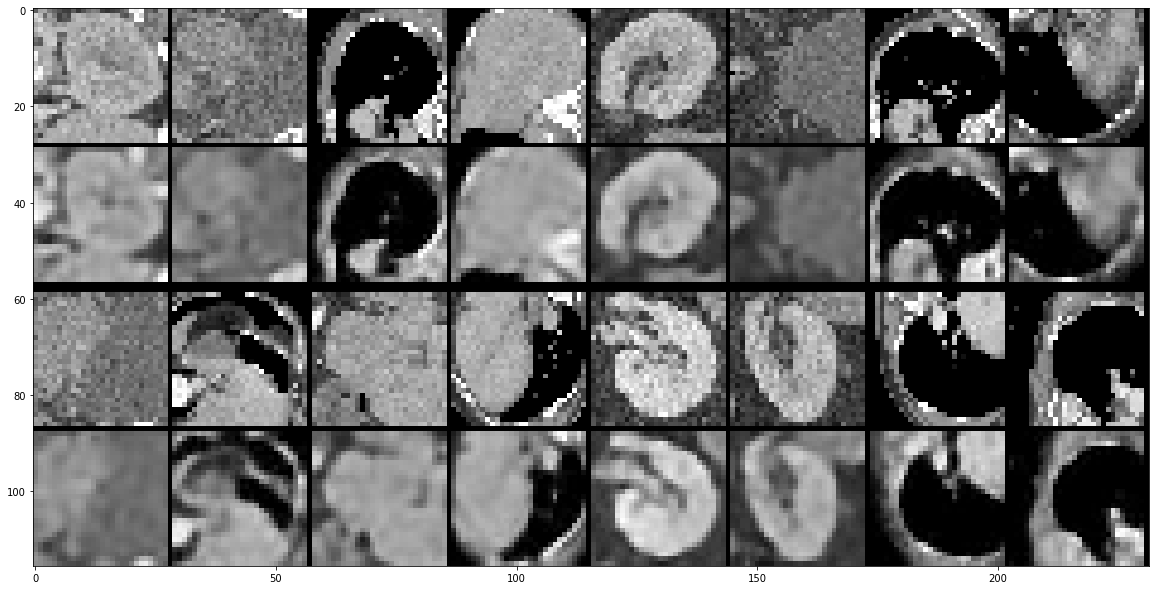

In [15]:
plot_real_vs_constructed(vae, test_dataset, device)

torch.Size([3, 12, 12])


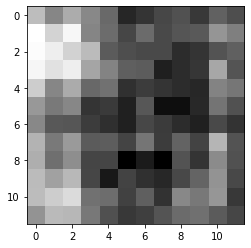

In [46]:
z = torch.randint(-1,1, (embedding_dim,3,3), dtype=torch.float, device=device)
img = vae._decoder.forward(z)
print(img.shape)
# img = F.normalize(img)
plt.imshow(img.cpu().detach().numpy()[0], cmap="gray")
# plt.imshow(img.moveaxis(1, 3).cpu().detach().numpy()[0])
plt.show()

In [103]:
test_img = test_dataset[5][0][None,:,:,:].to(device)
lat = vae.encoder.forward(test_img)
img = vae.decoder.forward(lat)

[]

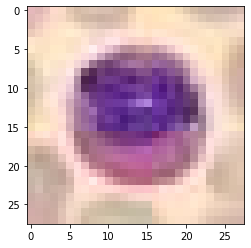

In [104]:
plt.imshow(test_img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

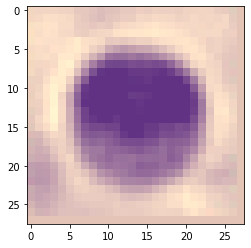

In [105]:
# img = F.normalize(img)
plt.imshow(img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


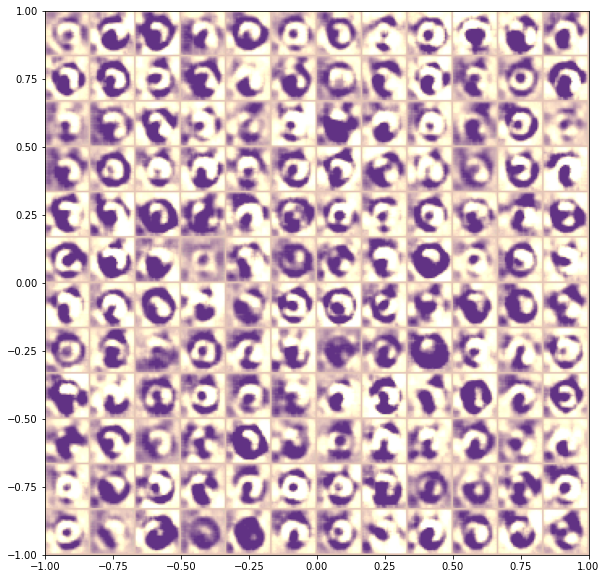

In [106]:
plot_reconstructed(vae, r0=(-1, 1), r1=(-1, 1), latent_dim=latent_dims)

# New Section

In [21]:
i = torch.randn((3, 28, 28))
cov1 = nn.Conv2d(3, 6, 3, stride=2)
cov2 = nn.Conv2d(6, 12, 3, stride=2)
m1 = nn.MaxPool2d(2)
m2 = nn.MaxUnpool2d(3)
lin1 = nn.Linear(75,108)
cov3 = nn.ConvTranspose2d(12,6,3, stride=2)#, output_padding=1)
cov4 = nn.ConvTranspose2d(6,3,3, stride=2, output_padding=1)
cov5 = nn.ConvTranspose2d(3,3,1, stride=1)#, output_padding=1)
print(i.flatten().shape, i.shape)
x = cov1(i)
x = cov2(x)
# x = m1(x)
print(x.flatten().shape, x.shape)
# x = lin1(x.flatten())
# x = x.reshape(3,6,6)
x = cov3(x)
x = cov4(x)
# x = cov4_5(x)
x = cov5(x)
# x = m2(x)
print(x.flatten().shape, x.shape)


torch.Size([2352]) torch.Size([3, 28, 28])
torch.Size([432]) torch.Size([12, 6, 6])
torch.Size([2352]) torch.Size([3, 28, 28])
